## DRF part 3

#### Validation

There are three types of validation:
- field level
- object level
- validators

*Field Level Validation*: <br> ***Note:*** This method is automatically invoked when `is_valid()` function is called.
```
def validate_name(self, value):
    print("validate_name called with:", value)
    if value[0].lower()!='r':
        print('condition true')
        raise serializers.ValidationError("name should statr with r")
    return value
```

*Object Level Validation*:<br> ***Note:*** It is written in `validate()` function and whole `data` is passed as `dict()`
```
def validate(self, data):
    nm = data.get('name')
    ct = data.get('city')
    if nm.lower() == 'subhan' and ct.lower()!= 'lahore':
        raise serializers.ValidationError("City must be Lahore")
    return data
```

*Validators*:<br> ***Note:*** It is used to create reusable components for validation and can be parsed easily across multiple data values for their validation. We can also write multiple validators.
```
def validate_with_r(value):
    if value[0].lower() != 'r':
        print('hereeeee')
        raise serializers.ValidationError("Name should Start with r!")
    return value
name = serializers.CharField(read_only=True)
name = serializers.CharField(validators=[validate_with_r])
```

### Validators priority / precedence
validators > field level > object level

### Model Serializer
It is used to create serializers easily without having to specify the field name. It is kind of a shortcut for doing the traditional work while creating models. Here are key properties:
- It automatically generates a set of fields for you, based on the model.
- It will automatically generate validators for the serializer, such as `unique_together` validators.
- It includes simple default implementations of `create()` and `update()`
- It uses `Meta` class as a shortcut and provide easy to use interface for model implementation.
Example code:
```
from rest_framework import serializers
from .models import Student

class StudentSerializer(serializers.ModelSerializer):
    class Meta:
        model = Student
        fields = "__all__"
```
***Note:*** we can use <br>`fields = '__all__' # for all attributes` <br> `fields = exclude('id') # for all except 'id'` <br> `read_only_fields = ['name'] # we can also write like:
extra_kwargs = {'name':{'read_only':True}}
`

### Function Based API View
In Django REST Framework (DRF), a function-based API view is a simple way to create API endpoints using regular Python functions, decorated with special DRF decorators like `@api_view`.

This is the most basic and beginner-friendly way to create an API in DRF.

```
from rest_framework.decorators import api_view
from rest_framework.response import Response
from rest_framework import status

@api_view(['GET', 'POST'])  # allowed HTTP methods
def student_api(request):
    if request.method == 'GET':
        # fetch and return data
        return Response({"message": "GET request received"})

    elif request.method == 'POST':
        # handle data creation
        return Response({"message": "POST request received"}, status=status.HTTP_201_CREATED)

```

### Class Based API View
A Class-Based API View in Django REST Framework is a more structured, reusable, and scalable way to define your API endpoints. It uses Python classes instead of functions and gives you more flexibility, especially as your app grows.



Example Code:
```
from rest_framework.views import APIView
from rest_framework.response import Response
from rest_framework import status

class StudentAPIView(APIView):

    def get(self, request):
        return Response({"message": "GET request from class-based API view"})

    def post(self, request):
        return Response({"message": "POST request from class-based API view"}, status=status.HTTP_201_CREATED)
```

***Note:*** In class based API views, we also have to change the `urls.py` as below:
```
from django.contrib import admin
from django.urls import path
from api import views
urlpatterns = [
    path('admin/', admin.site.urls),
    path('studentapi/', views.StudentAPI.as_view()),
    path('studentapi/<int:pk>', views.StudentAPI.as_view()),
]
```

### Generic APIView
In Django REST Framework (DRF), a Generic APIView is a powerful abstraction built on top of the APIView class. It helps you write less code for common patterns like:
- Listing objects
- Creating new objects
- Retrieving a single object
- Updating or deleting objects

GenericAPIView is a class in DRF that provides core behavior like:
- Defining a queryset
- Assigning a serializer_class
- Automatically handling lookup_field (like pk)
- Useful helper methods like:
`.get_queryset()`
`.get_object()`
`.get_serializer()`
- But you don’t use GenericAPIView alone — it's usually combined with mixins.

### Mixins
In Django REST Framework (DRF), mixins are small, reusable classes that provide common CRUD operations like:
- list (GET all)
- create (POST)
- retrieve (GET one)
- update (PUT/PATCH)
- destroy (DELETE)
You use them with GenericAPIView to quickly build APIs with minimal boilerplate.

Classes names are:
- `ListModelMixin`
- `CreateModelMixin`
- `RetrieveModelMixin`
- `UpdateModelMixin`

### ListModelMixin
It is used to list the queryset and provides `list` method for it.
<br> _Code Example_:
```
from rest_framework.mixins import ListModelMixin
from rest_framework.generics import GenericAPIView
class StudentList(ListModelMixin, GenericAPIView):
    queryset = Student.objects.all()
    serializer_class = StudentSerializer
    def get(self, request, *args, **kwargs):
        return self.list(request, *args, **kwargs)
```

### CreateModelMixin
It is used to create the model instance and provides `create` method for it.
<br> _Code Example_:
```
from rest_framework.mixins import CreateModelMixin
from rest_framework.generics import GenericAPIView
class StudentCreate(CreateModelMixin, GenericAPIView):
    queryset = Student.objects.all()
    serializer_class = StudentSerializer
    def post(self, request, *args, **kwargs):
        return self.create(request, *args, **kwargs)
```

### RetrieveModelMixin
It is used to return the existing model instance and provides `retrieve` method for it.
<br> _Code Example_:
```
from rest_framework.mixins import RetireveModelMixin
from rest_framework.generics import GenericAPIView
class StudentRetrieve(RetireveModelMixin, GenericAPIView):
    queryset = Student.objects.all()
    serializer_class = StudentSerializer
    def get(self, request, *args, **kwargs):
        return self.retrieve(request, *args, **kwargs)
```

### UpdateModelMixin
It is used to update the existing model instance and provides `update` method for it. It also supports partial update as well.
<br> _Code Example_:
```
from rest_framework.mixins import UpdateModelMixin
from rest_framework.generics import GenericAPIView

class StudentUpdate(UpdateModelMixin, GenericAPIView):
    
    queryset = Student.objects.all()
    serializer_class = StudentSerializer
    
    def put(self, request, *args, **kwargs): # handles patch as well
        return self.update(request, *args, **kwargs)
    
```

### DestroyModelMixin
It is used to update the existing model instance and provides `update` method for it. It also supports partial update as well.
<br> _Code Example_:
```
from rest_framework.mixins import DestroyModelMixin
from rest_framework.generics import GenericAPIView

class StudentDestroy(DestroyModelMixin, GenericAPIView):

    queryset = Student.objects.all()
    serializer_class = StudentSerializer
    
    def delete(self, request, *args, **kwargs):
        return self.destroy(request, *args, **kwargs)
```

### Concerete View Class
In Django REST Framework (DRF), Concrete API Views are pre-built combinations of GenericAPIView + relevant mixins — already packaged together to give you ready-to-use CRUD views with minimal code.
<br>***Note:*** Think of them as shortcuts for the most common use cases in REST APIs.



- `ListAPIView` extends `GenericAPIView` and `ListModelMixin`
<br>
Example code:

```
from rest_framework.generics import ListAPIView
class StudentList(ListAPIView):
    queryset = Student.objects.all()
    serializer_class = StudentSerializer
```
- `CreateAPIView` extends `GenericAPIView` and `CreateModelMixin`
<br>
Example code:

```
from rest_framework.generics import CreateAPIView
class StudentCreate(CreateAPIView):
    queryset = Student.objects.all()
    serializer_class = StudentSerializer
```
- `RetrieveAPIView` extends `GenericAPIView` and `RetrieveModelMixin`
<br>
Example code:

```
from rest_framework.generics import RetrieveAPIView
class StudentRetrieve(RetrieveAPIView):
    queryset = Student.objects.all()
    serializer_class = StudentSerializer
```
- `UpdateAPIView` extends `GenericAPIView` and `UpdateModelMixin`
<br>***Note:*** It supports both `PUT` and `PATCH`
Example code:

```
from rest_framework.generics import UpdateAPIView
class StudentUpdate(UpdateAPIView):
    queryset = Student.objects.all()
    serializer_class = StudentSerializer
```
- `DestroyAPIView` extends `GenericAPIView` and `DestroyModelMixin`
<br>
Example code:

```
from rest_framework.generics import DestroyAPIView
class StudentDestroy(DestroyAPIView):
    queryset = Student.objects.all()
    serializer_class = StudentSerializer
```

- `ListCreateAPIView` provides features of both `ListAPIView` and `CreateAPIView`
- `RetrieveUpdateAPIView` provides features of both `RetrieveAPIView` and `UpdateAPIView`<br>***Note:*** It provides `GET`, `PUT` and `PATCH` functionality
- `RetrieveDestroyAPIView` provides features of both `RetrieveAPIView` and `DestroyAPIView`
- `RetrieveUpdateDestroyAPIView` provides features of `Retrieve`, `Update` and `Destroy`

## Installing Postgresql and connecting with Django in fedora

- Check if postgresql is already installed using `sudo dnf module list postgresql`
- Install community version using `sudo dnf install postgresql-server postgresql-contrib`
- Initialize the `postgres` database using `sudo postgresql-setup --initdb`
- Enable and start postgresql using `sudo systemctl enable --now postgresql`
- Check the status using `sudo systemctl status postgresql`
- Switch to postgres user to create password for it using `sudo -i -u postgres`
- Set the password using `\password postgres`

## To browse database we can use `dbeaver-ce` and `pgAdmin 4`
To install follow these commands:
- change the `local` params in config file to `md5` for password based authentication, that will be used for connection with database from dbeaver and pgAdmin afterwards from <br> `sudo nano /var/lib/pgsql/data/pg_hba.conf`
- Restart postgresql using <br> `sudo systemctl restart postgresql`
- Check if the post is listening using <br> `sudo ss -tulnp | grep 5432`
- Install `dbeaver-ce` from <br> `wget https://dbeaver.io/files/dbeaver-ce-latest-stable.x86_64.rpm`
- Then install the rpm package using <br> `sudo dnf install ./dbeaver-ce-*.rpm`
- Run and make connections.
- To install `pgAdmin 4` desktop client we can use <br> `sudo rpm -i   https://ftp.postgresql.org/pub/pgadmin/pgadmin4/snapshots/2025-07-11/yum/pgadmin4-fedora-repo-2-1.noarch.rpm`
- Then install using <br>`sudo dnf install pgadmin4-desktop`

## Connecting to django project
To connect the postgresdb to django we can follow this [source](https://www.w3schools.com/django/django_db_connect.php)

In `settings.py` after creating a new project. Change the DATABASES to:
```
DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.postgresql',
        'NAME': 'django_connection_db',
        'USER': 'postgres',
        'PASSWORD': '123',
        'HOST': 'localhost',
        'PORT': '5432'
    }
}
```
To create new database, we can use dbeaver and right click on databases to create one. Here `django_connection_db` is the database name with username as `postgres` and password as `123`. Note that the server is running on `localhost:5432` which is the defaut setup and we can change the port in the config file. In production, we don't use passwords in plain text instead we use ssh based authentication methods to connect to our database server.

***Note*** : Django needs a module to handle the postgresql database properly. To install we can use <br> `pip install psycopg`

Now after creating a model, makemigrations/migrate and run the application. We may have to create a separate connection in `dbeaver-ce` to see the data inside the database tables: <br> 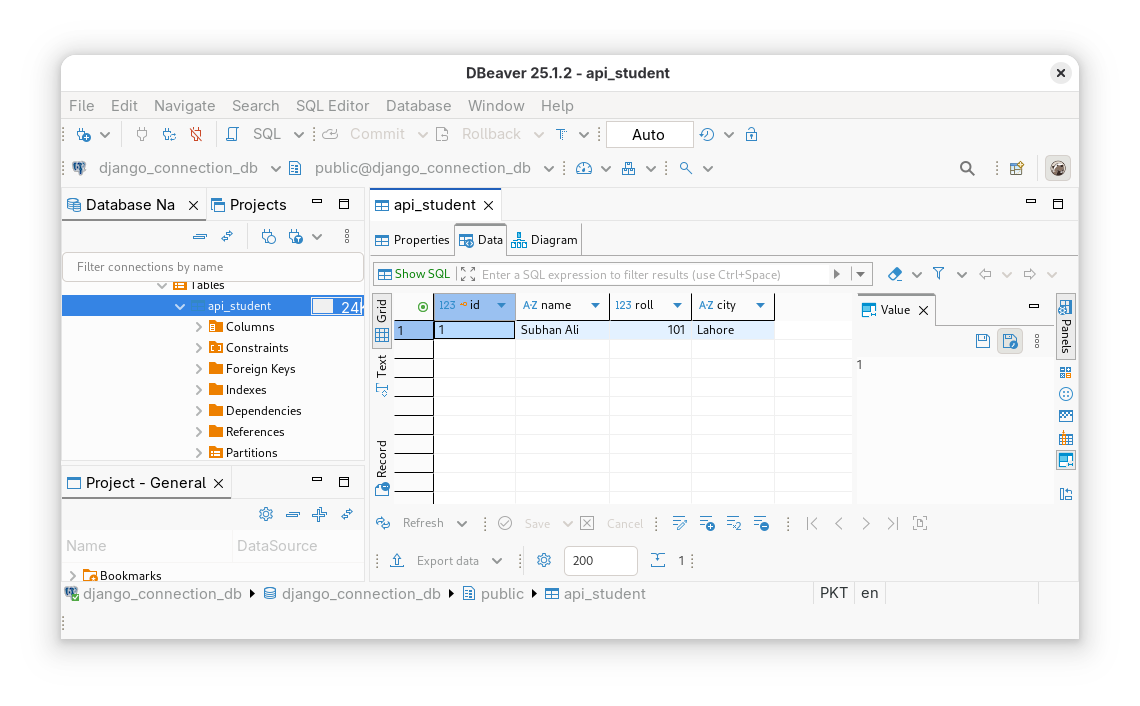